In [1]:
%cd ..

/Users/mateoibarguen/Desktop/CSC 482/complementary_fact_finder


In [43]:
from gensim.corpora import WikiCorpus, MmCorpus, Dictionary
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import random
import codecs
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel, TfidfModel, LsiModel
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
import pickle
import json
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.similarities import MatrixSimilarity
from gensim.models.coherencemodel import CoherenceModel
from src.topic_models import *
from gensim.models import wrappers
import matplotlib.pyplot as plt
import numpy as np

In [48]:
# !pip install pyLDAvis

In [39]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [272]:
with open ('data/token_sents.pkl', 'rb') as fp:
    wiki_tokens = pickle.load(fp)

In [273]:
with open ('data/sents.pkl', 'rb') as fp:
    wiki_sents = pickle.load(fp)

In [ ]:
doc = student_tokens[2]
vec_bow = wiki_tfidf[wiki_dict.doc2bow(doc)]
vec_lsi = lsi[vec_bow]
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])

In [2]:
%cd ..

/Users/mateoibarguen/Desktop/CSC 482/complementary_fact_finder


In [3]:
from src.topic_models import *

In [67]:
lda_wiki = LdaWikiModel()

In [68]:
lda_wiki.predict_lda_index(35)

know shih tzus originate china way shih tzu type dog didnt already know shih tzus animal talk think friend today ill telling shih tzus eat act need take care shih tzus eat grain free food sometimes make dog food example turkey chicken sliced carrot buy dog food test see like food shih tzus picky dog take find right food two shih tzus often like different thing might test different food like vegetable cant fruit seed well know like eat shih tzus active like play lot rarely like sleep theyre busy playing sleep like snuggle morning right back mischievous playful example sometimes take thing destroy latter forgive someday theyre also loving dog dont play get little mad start bark sweet time shih tzus also smart shih tzus also think kingqueen world cant smart frist need take care shih tzu food water leash dog bed patient also willing play time walk time also need lot free time kid play dog shih tzus lot energy know expert shih tzus eat act need take care make seans learn something everyday 

[(14043, 0.7167471),
 (1489, 0.69566643),
 (4913, 0.6910844),
 (14272, 0.68829405),
 (5555, 0.6767226),
 (9640, 0.67461836),
 (4975, 0.6693876),
 (592, 0.66615707),
 (1158, 0.66174144),
 (1214, 0.66174144)]

In [10]:
lda_wiki.get_topic(lda_wiki.student_tokens[2])

[(3, 0.013343182),
 (6, 0.014114444),
 (7, 0.17802818),
 (13, 0.013147894),
 (14, 0.041017044),
 (23, 0.050972708),
 (27, 0.013610578),
 (39, 0.065543145),
 (40, 0.19638859),
 (50, 0.012314808),
 (51, 0.027564732),
 (54, 0.013338183),
 (57, 0.013059677),
 (64, 0.06876884),
 (66, 0.013218275),
 (67, 0.078096345),
 (72, 0.01331664),
 (79, 0.026174542),
 (83, 0.02612811),
 (84, 0.012659333),
 (85, 0.034651484),
 (98, 0.013729465),
 (99, 0.04102299)]

In [ ]:
lda_wiki.lda.get_topics([''])

In [38]:
len(lsi_wiki.wiki_sents)

14391

In [45]:
coherence_model = CoherenceModel(model=lsi_wiki.lsi, corpus=lsi_wiki.wiki_corpus, texts=lsi_wiki.student_tokens, dictionary=lsi_wiki.wiki_dict, coherence='c_npmi')

In [46]:
coherence_model.get_coherence()

inf

In [31]:
lda_wiki.student_tokens

[['gold',
  'rush',
  'introduction',
  'beginning',
  'year',
  '1848',
  'life',
  'changing',
  'gold',
  'rush',
  'begun',
  'james',
  'marshall',
  'assigned',
  'build',
  'sawmill',
  'john',
  'sutters',
  'workersin',
  'process',
  'found',
  'three',
  'gold',
  'nugget',
  'showed',
  'gold',
  'john',
  'sutterjohn',
  'sutter',
  'wanted',
  'keep',
  'secret',
  'sam',
  'brannan',
  'spread',
  'word',
  'immigrant',
  'gold',
  'said',
  'rosie',
  'stripped',
  'wheat',
  'yelped',
  'oooohhhh',
  'people',
  'wanted',
  'gold',
  'rush',
  'president',
  'polk',
  'said',
  'gold',
  'california',
  'gold',
  'rush',
  'item',
  'stare',
  'ball',
  'favorite',
  'people',
  'item',
  'gold',
  'rush',
  'like',
  'gamesclothes',
  'toolswhich',
  'let',
  'know',
  'time',
  'period',
  'conclusion'],
 ['kitten',
  'know',
  'kitten',
  'cant',
  'see',
  'till',
  'two',
  'week',
  'kitten',
  'good',
  'pet',
  'love',
  'play',
  'kitten',
  'good',
  'pet',
 

In [17]:
student_corpus = [lda_wiki.wiki_dict.doc2bow(lda_wiki.student_tokens[i]) for i in range(len(lda_wiki.student_tokens))]

In [41]:
def compute_perplexity(lda_model):
    return np.exp(lda_n.log_perplexity(student_corpus))

In [59]:
lda_perplexity = []
n_topics = [18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42]
for n in n_topics:
    lda_n = lda_wiki.compute_lda(n)
    lda_perplexity.append(compute_perplexity(lda_n))

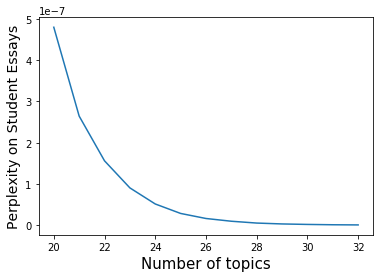

In [60]:
fig, ax = plt.subplots()
plt.plot(lda_perplexity)
ax.set_xticklabels(n_topics)
plt.xlabel('Number of topics', fontsize=15)
plt.ylabel('Perplexity on Student Essays', fontsize=14)
plt.show()

In [65]:
best_lda = LdaWikiModel(num_topics=28)

In [62]:
best_lda.predict_lda_index(0)

gold rush introduction beginning year 1848 life changing gold rush begun james marshall assigned build sawmill john sutters workersin process found three gold nugget showed gold john sutterjohn sutter wanted keep secret sam brannan spread word immigrant gold said rosie stripped wheat yelped oooohhhh people wanted gold rush president polk said gold california gold rush item stare ball favorite people item gold rush like gamesclothes toolswhich let know time period conclusion



Results: 

Score: 0.9190000295639038
('April', 'Its birthstone is the diamond.')
Score: 0.9190000295639038
('August 10', 'Destruction of Nineveh.')
Score: 0.9190000295639038
('April 18', ' 1689  Bostonians rise up in rebellion against Sir Edmund Andros.')
Score: 0.9190000295639038
('Electronics', 'A printed circuit board.')
Score: 0.9190000295639038
('Anne Boleyn', 'After she was falsely accused of adultery incest and high treason she was executed.')
Score: 0.9190000295639038
('June 26', ' 1541  Francisco Pizarro

[(5, 0.9194806),
 (11431, 0.9194803),
 (9616, 0.91947854),
 (2877, 0.9194759),
 (4359, 0.9194752),
 (11725, 0.91947514),
 (4479, 0.9194747),
 (3192, 0.91947466),
 (14383, 0.91947466),
 (6873, 0.9194745)]

In [18]:
lda_wiki.lda.log_perplexity(student_corpus)

-43.83138118196433

In [20]:
lsi_wiki = LsiWikiModel()

In [1]:
ex = "My dog is cool. == "

In [2]:
re.search(r'.*==$', ex)

NameError: name 're' is not defined

In [21]:
lsi_wiki.predict_lsi(['dog', 'cat'])

dog cat



Results: 

Score: 0.8320000171661377
('Cat', 'Cats which are not specific breeds can be referred to as domestic shorthair DSH or domestic longhair DLH.')
Score: 0.8230000138282776
('Grey wolf', 'It is the ancestor of the domestic dog.')
Score: 0.7990000247955322
('Cat', 'The big cats and wild cats are not tame and can be very dangerous.')
Score: 0.7519999742507935
('Lion', 'Compared to other cats lions are social.')
Score: 0.675000011920929
('Cat', 'Domestic cats are often called house cats when kept as indoor pets.')
Score: 0.6299999952316284
('Cat', 'Felines are usually called either big cats or small cats.')
Score: 0.609000027179718
('Cat', '\n\nCats also called domestic cats Felis catus are small carnivorous meateating mammals of the family Felidae.')
Score: 0.5680000185966492
('Dog', 'Dogs often have jobs including as police dogs army dogs assistance dogs fire dogs messenger dogs hunting dogs herding dogs or rescue dogs.')
Score: 0.5550000071525574
('Cat', 'Domestic cat

[(2041, 0.8321705),
 (13679, 0.82307065),
 (2046, 0.79909563),
 (4735, 0.75176436),
 (2030, 0.6749259),
 (2043, 0.6303556),
 (2029, 0.6090236),
 (2845, 0.5678887),
 (2040, 0.55495805),
 (2844, 0.5453137)]

In [20]:
lsi_wiki.predict_lsi_index(student_index=10, num_results=20)

dog know baby dog call pup puppy dog call puppy one year old dog sometimes referred man best friend kept domestic pet usually loyal like around human dog breed earliest dog breeder used wolf create domestic dog beginning human purposefully bred dog perform various task sleek greyhound type bred chase fleet football prey huge mastiff example dog bred specific job dog save day dog save day show dog police dog one water get dog save helper see even help open door help walk home home see dog lot like friend sometimes police dog wear gear dog help dog help help bye see get blind dog helper help lot help open door help keep away man take money well dog help come time smart like give money dog went get drink dog come back see dog drink want well teach dog dog become pet new evidene dog probably evolved wolf single location 20000 40000 year ago study suggests looking rate change dna oldest specimen scientist able place timing domestication dog 20000 40000 year ago train dog frist need give dog

[(13679, 0.62648535),
 (2985, 0.59825754),
 (2850, 0.59361124),
 (1474, 0.5624349),
 (13485, 0.5611255),
 (2851, 0.5523321),
 (4976, 0.5513568),
 (13160, 0.543472),
 (4632, 0.5265628),
 (25, 0.52626187),
 (5675, 0.52595127),
 (391, 0.5259104),
 (13170, 0.5246036),
 (5818, 0.52324283),
 (5292, 0.522913),
 (211, 0.52177334),
 (2856, 0.5146035),
 (2849, 0.5137134),
 (13650, 0.5109728),
 (1476, 0.5089854)]

In [300]:
class WikiModel:
    def __init__(self, wiki_tokens=wiki_tokens, wiki_sents=wiki_sents):
        self.wiki_tokens = wiki_tokens
        self.wiki_sents = wiki_sents
        self.wiki_dict = Dictionary(wiki_tokens)
        self.wiki_corpus = [wiki_dict.doc2bow(t) for t in wiki_tokens]
        self.wiki_tfidf = TfidfModel(self.wiki_corpus, id2word=self.wiki_dict)
        self.wiki_tfidf_corpus = self.wiki_tfidf[self.wiki_corpus]
        self.lsi = self.compute_lsi(100)
        self.lsi_index = MatrixSimilarity(self.lsi[self.wiki_tfidf_corpus])
        self.lda = self.compute_lda(100)
        self.lda_index = MatrixSimilarity(self.lda[self.wiki_corpus])
    
    def compute_lsi(self, num_topics=None):
        lsi = LsiModel(self.wiki_tfidf_corpus, num_topics=num_topics, id2word=self.wiki_dict)
        return lsi

    def compute_lda(self, num_topics=None):
        lda = LdaModel(self.wiki_corpus, num_topics=num_topics, id2word=self.wiki_dict)
        return lda
    
    def predict_lsi(self, text, num_results):
        print(text)
        print('\n')
        vec_bow = self.wiki_tfidf[self.wiki_dict.doc2bow(text)]
        vec_lsi = self.lsi[vec_bow]
        sims = self.lsi_index[vec_lsi]
        sorted_sims = sorted(enumerate(sims), key=lambda item: -item[1])
        for i in sorted_sims[:100]:
            print(self.wiki_sents[i[0]])
        

In [ ]:
class LsiWikiModel(WikiModel):
    def __init__(self)

In [301]:
topic_model = WikiModel()

In [302]:
topic_model.predict_lsi(student_tokens[0], 5)

['gold', 'rush', 'introduction', 'beginning', 'year', '1848', 'life', 'changing', 'gold', 'rush', 'begun', 'james', 'marshall', 'assigned', 'build', 'sawmill', 'john', 'sutters', 'workersin', 'process', 'found', 'three', 'gold', 'nugget', 'showed', 'gold', 'john', 'sutterjohn', 'sutter', 'wanted', 'keep', 'secret', 'sam', 'brannan', 'spread', 'word', 'immigrant', 'gold', 'said', 'rosie', 'stripped', 'wheat', 'yelped', 'oooohhhh', 'people', 'wanted', 'gold', 'rush', 'president', 'polk', 'said', 'gold', 'california', 'gold', 'rush', 'item', 'stare', 'ball', 'favorite', 'people', 'item', 'gold', 'rush', 'like', 'gamesclothes', 'toolswhich', 'let', 'know', 'time', 'period', 'conclusion']


('January 24', ' 1848  California gold rush James W Marshall finds gold at Sutters Mill near Sacramento.')
('United States dollar', 'Some are silver colored and some are gold colored.')
('December 5', '1848  California gold rush In a message before the US Congress US President James K Polk confirms that 

In [259]:
lsi = topic_model.compute_lsi(20)

In [262]:
# cm = CoherenceModel(lsi, corpus = topic_model.wiki_corpus, dictionary=topic_model.wiki_dict, text)

In [256]:
# model_list, coherence_values = topic_model.compute_coherence_values(dictionary=topic_model.wiki_dict, corpus=topic_model.wiki_corpus, texts=topic_model.wiki_tokens, start=2, limit=40, step=6)

In [289]:
wiki_dict = Dictionary(wiki_tokens)
wiki_corpus = [wiki_dict.doc2bow(t) for t in wiki_tokens]

In [290]:
wiki_tfidf = TfidfModel(wiki_corpus, id2word=wiki_dict)
wiki_tfidf_corpus = wiki_tfidf[wiki_corpus]

In [291]:
lsi = LdaModel(wiki_tfidf_corpus, num_topics=100, id2word=wiki_dict)

In [226]:
lsi.log_perplexity(wiki_tfidf_corpus)

-201.1761474609371

In [166]:
index = MatrixSimilarity(lsi[wiki_tfidf_corpus])

In [330]:
lsi = LdaModel(wiki_corpus, id2word=wiki_dict, num_topics=100)
index = MatrixSimilarity(lsi[wiki_corpus])

### Student tokens exploration

In [14]:
with open('data/data.json', 'r') as fb:
    student_tokens = json.load(fb)

In [68]:
student_dict = Dictionary(student_tokens)
student_corpus = [student_dict.doc2bow(s) for s in student_tokens]

In [64]:
for c in student_corpus:
    print(c)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 9), (14, 1), (15, 1), (16, 2), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 5), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)]
[(9, 2), (19, 5), (20, 1), (46, 2), (54, 1), (55, 3), (56, 1), (57, 4), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 5), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 6), (72, 8), (73, 3), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 8), (80, 1), (81, 1), (82, 1), (83, 15), (84, 1), (85, 1), (86, 1), (87, 9), (88, 3), (89, 4), (90, 3), (91, 1), (92, 1), (93, 15), (94, 1), (95, 7), (96, 1), (97, 1), (98, 1), (99, 1), (100, 6), (101, 4), (102, 1), (103, 2), (104, 1), (105, 5), (106, 1), (

In [52]:
tfidf = TfidfModel(student_corpus, id2word=student_dict) 

In [55]:
student_corpus_tfidf = tfidf[student_corpus]

In [56]:
student_corpus_tfidf

In [100]:
student_lda = LdaModel(student_corpus, num_topics=10, id2word=student_dict)

In [101]:
student_lda.print_topics(num_words=10)

[(0,
  '0.012*"get" + 0.009*"game" + 0.009*"know" + 0.008*"like" + 0.008*"one" + 0.007*"also" + 0.006*"play" + 0.005*"shark" + 0.005*"dont" + 0.005*"dog"'),
 (1,
  '0.030*"wolf" + 0.010*"gray" + 0.009*"pack" + 0.008*"get" + 0.008*"like" + 0.008*"one" + 0.007*"also" + 0.007*"dont" + 0.007*"know" + 0.006*"animal"'),
 (2,
  '0.015*"dog" + 0.010*"play" + 0.010*"game" + 0.009*"know" + 0.009*"also" + 0.008*"need" + 0.007*"like" + 0.006*"people" + 0.006*"get" + 0.006*"different"'),
 (3,
  '0.011*"animal" + 0.010*"like" + 0.010*"one" + 0.010*"cat" + 0.009*"wolf" + 0.008*"also" + 0.008*"lot" + 0.008*"know" + 0.008*"dog" + 0.007*"eat"'),
 (4,
  '0.014*"like" + 0.010*"wolf" + 0.010*"one" + 0.009*"get" + 0.008*"know" + 0.008*"dog" + 0.007*"many" + 0.007*"also" + 0.007*"eat" + 0.006*"thing"'),
 (5,
  '0.021*"wolf" + 0.010*"like" + 0.010*"gray" + 0.009*"also" + 0.009*"get" + 0.008*"dog" + 0.008*"one" + 0.007*"play" + 0.007*"know" + 0.007*"need"'),
 (6,
  '0.018*"dog" + 0.008*"get" + 0.007*"one" + 0.

In [74]:
student_lda[student_corpus[0]]

[(0, 0.9874949)]

In [35]:
# student_tokens[34]

In [44]:
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(student_lda, student_corpus, student_dict)
# vis

In [45]:
len(student_tokens)

210

In [110]:
doc = ['wolf', 'cool']
test_term = student_lda.id2word.doc2bow(doc)
doc_topics = student_lda.get_document_topics(test_term, minimum_probability=0.0002)
#term_topics = student_lda.get_term_topics(ter)

In [111]:
doc_topic

[(5, 0.6998773)]

In [97]:
test_term

[(130, 1), (306, 1)]

In [113]:
doc = student_tokens[0]

In [117]:
test_term = student_lda.id2word.doc2bow(doc)
doc_topics =student_lda.get_document_topics(test_term, minimum_probability=0.20)

In [120]:
doc_topics

[(3, 0.987487)]

In [149]:
# student_tokens[0]

In [188]:
student_tokens[2]

['guide',
 'rock',
 'mineral',
 '4000',
 'different',
 'type',
 'mineral',
 'numerous',
 'rare',
 'rock',
 'mineral',
 'also',
 'ton',
 'common',
 'rock',
 'mineral',
 'every',
 'month',
 'one',
 'sometimes',
 'two',
 'birthstones',
 'silver',
 'gold',
 'hope',
 'enjoy',
 'guide',
 'rock',
 'mineral',
 'first',
 'four',
 'rare',
 'rock',
 'diamond',
 'ruby',
 'sapphire',
 'emerald',
 'antimatter',
 'cost',
 '625',
 'trillion',
 'per',
 'gram',
 'next',
 'rock',
 'mineral',
 'common',
 'rock',
 'mineral',
 'common',
 'like',
 'serpentine',
 'serpentine',
 'california',
 'state',
 'rock',
 'common',
 'california',
 'also',
 'birthstones',
 'know',
 'month',
 'one',
 'birthstone',
 'like',
 'october',
 'opal',
 'tourmaline',
 'emerald',
 'may',
 'popular',
 'one',
 'reason',
 'popular',
 'pretty',
 'finally',
 'silver',
 'gold',
 'silver',
 'cost',
 '1550',
 'per',
 'ounce',
 'gold',
 'cost',
 '128870',
 'per',
 'ounce',
 'gold',
 'worth',
 'per',
 'ounce',
 'silver',
 'also',
 'denser',


In [331]:
student_doc = student_tokens[0]
wiki_corpus[wiki_dict.doc2bow(student_doc)]

TypeError: list indices must be integers or slices, not list

In [294]:
def predict_student_doc(student_index):
    student_doc = student_tokens[student_index]
    print(' '.join(student_doc))
    print('\n\n')
    vec_bow = wiki_tfidf[wiki_dict.doc2bow(student_doc)]
    vec_lsi = lsi[vec_bow]
    sims = index[vec_lsi]
    sims = sorted(enumerate(sims), key=lambda item: -item[1])
    for i in sims[:10]:
        print('Score: ', i[1])
        print(wiki_sents[i[0]])
        print('\n')
    return 

In [295]:
predict_student_doc(60)

informational ondemand like stunt yes book snowboarding fun hit jump learn new thing steep slope hit jump snowboarding fun hit jump example mammoth ski resort tried heel grab face planted powder snow another example backflip accident powder jump one example 180 landed learn new thing snowboarding fun learn new thing example learned stop another example learned carve snow one example learned jump board conclusion snowboarding fun hit jump learn new thing steep slope think snowboarding fun fun think snowboarding fun



Score:  0.6948601
('Special relativity', 'The result was special relativity theory which brought together a new principle the constancy of the speed of light  and the previously established principle of relativity.')


Score:  0.69151306
('August 15', ' 1869  The Meiji Government in Japan establishes six new ministries including one for Shinto.')


Score:  0.6830139
('July 18', ' 1898  Marie and Pierre Curie announce the discovery of a new element and proposed to call it p

In [189]:
doc = student_tokens[2]
vec_bow = wiki_tfidf[wiki_dict.doc2bow(doc)]
vec_lsi = lsi[vec_bow]
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])

In [190]:
sims

[(2906, 0.64762014),
 (13830, 0.6467161),
 (5716, 0.62135035),
 (3268, 0.61610115),
 (4017, 0.60542756),
 (2769, 0.58359087),
 (14009, 0.582927),
 (3658, 0.5827099),
 (590, 0.5715759),
 (14390, 0.56706244),
 (5642, 0.55757827),
 (8412, 0.5410841),
 (13725, 0.5406643),
 (616, 0.5378932),
 (13999, 0.52986586),
 (966, 0.5278363),
 (5938, 0.52774084),
 (14093, 0.5201176),
 (13647, 0.5199637),
 (1776, 0.50328875),
 (3628, 0.5031408),
 (3816, 0.5028924),
 (13926, 0.5013269),
 (4006, 0.5005419),
 (60, 0.49680296),
 (13924, 0.492888),
 (531, 0.49031886),
 (5625, 0.48906487),
 (5412, 0.48881304),
 (323, 0.4885143),
 (3871, 0.48699108),
 (3255, 0.485152),
 (3784, 0.4839411),
 (2905, 0.48117003),
 (5294, 0.4806291),
 (13377, 0.47932982),
 (5409, 0.47821534),
 (13990, 0.47720855),
 (4632, 0.47518128),
 (3007, 0.47397462),
 (2430, 0.47365868),
 (5744, 0.47243926),
 (7952, 0.47081646),
 (5631, 0.46991056),
 (2400, 0.46840382),
 (1563, 0.46755657),
 (2822, 0.46680132),
 (13820, 0.46575016),
 (13872, 

In [194]:
wiki_sents[3268]

('Video game',
 'Also in 2004 Nintendo released the Dual Screen DS which has two separate screens one of which is a touchscreen.')